In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp

In [5]:
data = pd.read_csv('NationalNames.csv')

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
...,...,...,...,...,...
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5


In [10]:
def task1():
    return data.iloc[:8]

task1()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


In [14]:
def task2():
    return data[-8:]

task2()

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [16]:
def task3():
    return data.columns

task3()

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

In [17]:
def task5():
    return data['Name'].nunique()

task5()

93889

In [29]:
def task10():
    return data.groupby('Year')['Name'].nunique()

task10()

Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64

In [39]:
def task11():
    unique_by_year = task10()
    return unique_by_year[unique_by_year == unique_by_year.max()]

task11()

Year
2008    32488
Name: Name, dtype: int64

In [60]:
def task12():
    data_for_2008 = data[data.Year == task11().index[0]]
    return data.iloc[data_for_2008['Count'].idxmax()]['Name']

task12()

'Jacob'

In [74]:
def task13():
    return pd.DataFrame(data.iloc[data[data.Name == 'Jacob'][data.Gender == 'F']['Count'].idxmax()]).T

task13()

C:\Users\SONTAX\AppData\Local\Temp\ipykernel_11504\1112043024.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return pd.DataFrame(data.iloc[data[data.Name == 'Jacob'][data.Gender == 'F']['Count'].idxmax()]).T


,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


In [214]:
def task14():
    names_by_gender = pd.DataFrame(data.groupby(['Year', 'Name'])['Gender'].count())
    gender_neutral = names_by_gender[names_by_gender.Gender == 2].reset_index().groupby('Year')['Name'].count()
    gender_neutral = pd.DataFrame({'Gender_neutral_names':gender_neutral})
    return pd.DataFrame(gender_neutral.loc[gender_neutral['Gender_neutral_names'].idxmax()]).T

task14()

,Gender_neutral_names
2008,2557


In [95]:
def task15():
    return data.groupby('Year')['Count'].sum()

task15()

Year
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
         ...   
2010    3686589
2011    3646730
2012    3643336
2013    3626802
2014    3670151
Name: Count, Length: 135, dtype: int64

In [151]:
def task16():
    total_born = pd.DataFrame(task15()).reset_index()
    return total_born.loc[total_born['Count'].idxmax()]['Year']

task16()

1957

In [181]:
def task17():
    count_by_gender = pd.DataFrame(data.groupby(['Year','Gender'])['Count'].sum()).reset_index()
    males = count_by_gender[count_by_gender['Gender'] == 'M']
    males = pd.Series(np.array(males['Count']), index=np.array(males['Year']), name='M')
    females = count_by_gender[count_by_gender['Gender'] == 'F']
    females = pd.Series(np.array(females['Count']), index=np.array(females['Year']), name='F')
    return pd.DataFrame({'F':females, 'M':males})

task17()

,F,M
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414
2013,1745339,1881463


In [188]:
def task18():
    count_by_gender = task17()
    return  count_by_gender[count_by_gender['F'] > count_by_gender['M']].count()[0]

task18()

54

In [197]:
def task21():
    males = data[data.Gender == 'M']
    return males[males.Name == 'Barbara']['Count'].sum()

task21()

4139

In [213]:
def task22():
    return f'Спостереження проводилось {data.groupby("Year")["Gender"].all().count()} років'

task22()

'Спостереження проводилось 135 років'

In [224]:
def task23():
    names_by_gender = pd.DataFrame(data.groupby(['Year', 'Name'])['Gender'].count())
    gender_neutral = names_by_gender[names_by_gender.Gender == 2].reset_index()
    gender_neutral = pd.DataFrame({'Gender_neutral_names':gender_neutral['Name'], 'Year':gender_neutral['Year']})
    gender_neutral = gender_neutral.groupby('Gender_neutral_names').count().reset_index()
    gender_neutral = gender_neutral[gender_neutral['Year'] == data.groupby("Year")["Gender"].all().count()].reset_index()
    return pd.DataFrame({'0':gender_neutral['Gender_neutral_names']})

task23()

,0
0,Francis
1,James
2,Jean
3,Jesse
4,Jessie
5,John
6,Johnnie
7,Joseph
8,Lee
9,Leslie


<Axes: >

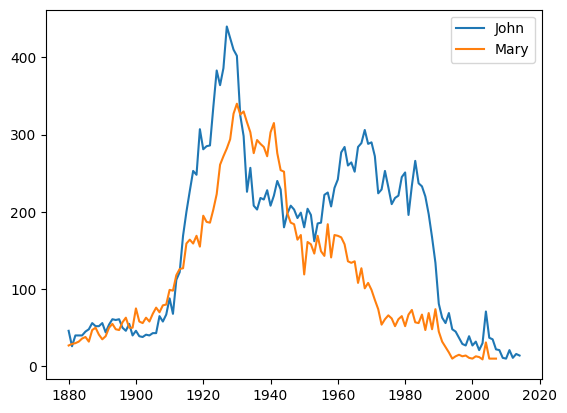

In [238]:
def task26():
    males = data[data['Gender'] == 'M']
    mary_males = males[males['Name'] == 'Mary']
    mary_males = pd.Series(np.array(mary_males['Count']), index=np.array(mary_males['Year']))
    females = data[data['Gender'] == 'F']
    john_females = females[females['Name'] == 'John']
    john_females = pd.Series(np.array(john_females['Count']), index=np.array(john_females['Year']))
    df = pd.DataFrame({'John':john_females, 'Mary':mary_males})
    return df.plot()

task26()